# Temperature Profiles Tutorial
This tutorial shows how to create and use temperature-pressure profiles. Currently, there are three temperature models: ``isothermal``, ``guillot``, and ``madhu``.

Let's start by importing some necessary modules:

In [1]:
import pyratbay.constants as pc
import pyratbay.atmosphere as pa

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4)

In [2]:
# Define a pressure profile where to evaluate the temperature models:
nlayers = 101
ptop = '1e-7 bar'
pbottom = '100 bar'
pressure_cgs = pa.pressure(ptop, pbottom, nlayers)
# See help(pa.pressure) for alternative ways to set the boundaries/units

# Same pressure array but in bar units:
pressure = pressure_cgs / pc.bar

## 1. Isothermal Profile

In [3]:
# To initialize an isothermal TP model, provide the number of layers:
tp_iso = pa.tmodels.Isothermal(pressure)

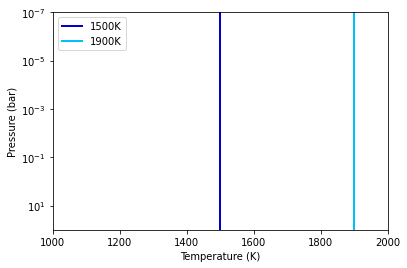

In [4]:
# Evaluate a TP profile at a given tempperature:
temp_iso_1500K = tp_iso(1500.0)
# to get another profile, evaluate at a different value:
temp_iso_1900K = tp_iso([1900.0])

# Plot the results:
plt.figure(10)
plt.clf()
ax = plt.subplot(111)
ax.plot(temp_iso_1500K, pressure, color='mediumblue', lw=2.0, label='1500K')
ax.plot(temp_iso_1900K, pressure, color='deepskyblue', lw=2.0, label='1900K')
ax.set_yscale('log')
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.set_xlim(1000, 2000)
ax.legend()

In [5]:
# This is some useful data contained in the object:
print(f'TP model name: {tp_iso.name}\n')
print(f'Number of parameters: {tp_iso.npars}')
print(f'Parameter names: {tp_iso.pnames}')
print(f'Parameter names as LaTeX: {tp_iso.texnames}\n')
print(f'Pressure array (barye, i.e., CGS):\n{tp_iso.pressure}\n')
print(f'Last evaluated temperature:\n{tp_iso.temperature}')

TP model name: isothermal

Number of parameters: 1
Parameter names: ['T_iso (K)']
Parameter names as LaTeX: ['$T\\ ({\\rm K})$']

Pressure array (barye, i.e., CGS):
[1.0000e-07 1.2303e-07 1.5136e-07 1.8621e-07 2.2909e-07 2.8184e-07
 3.4674e-07 4.2658e-07 5.2481e-07 6.4565e-07 7.9433e-07 9.7724e-07
 1.2023e-06 1.4791e-06 1.8197e-06 2.2387e-06 2.7542e-06 3.3884e-06
 4.1687e-06 5.1286e-06 6.3096e-06 7.7625e-06 9.5499e-06 1.1749e-05
 1.4454e-05 1.7783e-05 2.1878e-05 2.6915e-05 3.3113e-05 4.0738e-05
 5.0119e-05 6.1660e-05 7.5858e-05 9.3325e-05 1.1482e-04 1.4125e-04
 1.7378e-04 2.1380e-04 2.6303e-04 3.2359e-04 3.9811e-04 4.8978e-04
 6.0256e-04 7.4131e-04 9.1201e-04 1.1220e-03 1.3804e-03 1.6982e-03
 2.0893e-03 2.5704e-03 3.1623e-03 3.8905e-03 4.7863e-03 5.8884e-03
 7.2444e-03 8.9125e-03 1.0965e-02 1.3490e-02 1.6596e-02 2.0417e-02
 2.5119e-02 3.0903e-02 3.8019e-02 4.6774e-02 5.7544e-02 7.0795e-02
 8.7096e-02 1.0715e-01 1.3183e-01 1.6218e-01 1.9953e-01 2.4547e-01
 3.0200e-01 3.7154e-01 4.5709e-

## 2. Guillot TP Profiles

The ``guillot`` model has six parameters as defined in Line et al. (2013): $\log\kappa'$,
$\log\gamma_1$, $\log\gamma_2$, $\alpha$, $T_{\rm irr}$, and $T_{\rm int}$.  The temperature profile is given as:

$$ T^4(p) = \frac{3 T_{\rm int}^{4}}{4} \left(\frac{2}{3} + \tau\right)
    + (1-\alpha) \frac{3 T_{\rm irr}^{4}}{4} \xi_1(\tau)
    +    \alpha  \frac{3 T_{\rm irr}^{4}}{4} \xi_2(\tau), $$
with
$$    \xi_i(\tau) = \frac{2}{3}
        + \frac{2}{3\gamma_i} \left[1 + \left(\frac{\gamma_i\tau}{2}-1\right)e^{-\gamma_i\tau}\right]
        + \frac{2\gamma_i}{3} \left(1-\frac{\tau^{2}}{2}\right)E_{2}(\gamma_i\tau), $$

where $E_{2}(\gamma_{i}\tau)$ is the second-order exponential
integral; $T_{\rm int}$ is the internal heat temperature; and $\tau(p)
= \kappa' p$ (note that this parameterization differs from that of
Line et al. (2013), which are related as $\kappa' \equiv \kappa/g$).  $T_{\rm irr}$ parametrizes the stellar irradiation absorbed by the planet as:

$$  T_{\rm irr} = \left(\frac{1-A}{f}\right)^{1/4}
                \left( \frac{R_{\rm s}}{2a}\right)^{1/2} T_{\rm s}, $$


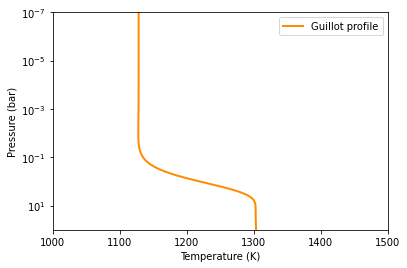

In [6]:
# To initialize a Guillot TP model, provide the pressure array (in CGS units):
tp_guillot = pa.tmodels.Guillot(pressure_cgs)


# Evaluate a Guillot TP profile for a given set of parameters:
log_kappa, log_gamma1, log_gamma2, alpha = -6.0, -0.25, 0.0, 0.0
t_irr = 1200.0
t_int = 100.0

params = log_kappa, log_gamma1, log_gamma2, alpha, t_irr, t_int
temp_guillot = tp_guillot(params)


# Plot the profile:
plt.figure(20)
plt.clf()
ax = plt.subplot(111)
ax.plot(temp_guillot, pressure, color='darkorange', lw=2.0, label='Guillot profile')
ax.set_yscale('log')
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.set_xlim(1000, 1500)
ax.legend()

In [7]:
# This is some useful data contained in the object:
print(f'TP model name: {tp_guillot.name}\n')
print(f'Number of parameters: {tp_guillot.npars}')
print(f'Parameter names: {tp_guillot.pnames}')
print(f'Parameter names as LaTeX: {tp_guillot.texnames}\n')
print(f'Pressure array (barye, i.e., CGS):\n{tp_guillot.pressure}\n')
print(f'Last evaluated temperature (K):\n{tp_guillot.temperature}')

TP model name: guillot

Number of parameters: 6
Parameter names: ["log(kappa')", 'log(gamma1)', 'log(gamma2)', 'alpha', 'T_irr (K)', 'T_int (K)']
Parameter names as LaTeX: ["$\\log (\\kappa')$", '$\\log (\\gamma_1)$', '$\\log (\\gamma_2)$', '$\\alpha$', '$T_{\\rm irr} (K)$', '$T_{\\rm int} (K)$']

Pressure array (barye, i.e., CGS):
[1.0000e-01 1.2303e-01 1.5136e-01 1.8621e-01 2.2909e-01 2.8184e-01
 3.4674e-01 4.2658e-01 5.2481e-01 6.4565e-01 7.9433e-01 9.7724e-01
 1.2023e+00 1.4791e+00 1.8197e+00 2.2387e+00 2.7542e+00 3.3884e+00
 4.1687e+00 5.1286e+00 6.3096e+00 7.7625e+00 9.5499e+00 1.1749e+01
 1.4454e+01 1.7783e+01 2.1878e+01 2.6915e+01 3.3113e+01 4.0738e+01
 5.0119e+01 6.1660e+01 7.5858e+01 9.3325e+01 1.1482e+02 1.4125e+02
 1.7378e+02 2.1380e+02 2.6303e+02 3.2359e+02 3.9811e+02 4.8978e+02
 6.0256e+02 7.4131e+02 9.1201e+02 1.1220e+03 1.3804e+03 1.6982e+03
 2.0893e+03 2.5704e+03 3.1623e+03 3.8905e+03 4.7863e+03 5.8884e+03
 7.2444e+03 8.9125e+03 1.0965e+04 1.3490e+04 1.6596e+04 2.0417e

### 2.1 Understanding the parameters

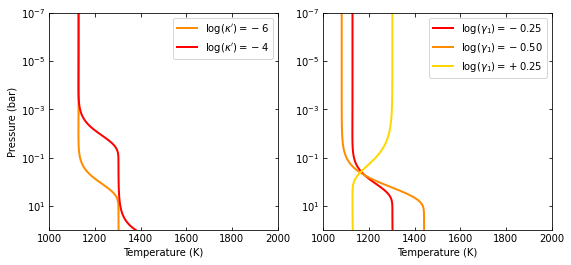

In [8]:
# log_kappa sets the pressure where the profile changes:
# Think it as: log_P0_bars approx 6 + log_kappa
params01 = -6.0, log_gamma1, log_gamma2, alpha, t_irr, t_int
params02 = -4.0, log_gamma1, log_gamma2, alpha, t_irr, t_int
temp_guillot01 = tp_guillot(params01)
temp_guillot02 = tp_guillot(params02)


# log_gamma sets the pressure where the profile changes:
# Think it as: log_gamma > 0 temperature inversion, log_gamma < 0: non-inversion
params11 = log_kappa, -0.25, log_gamma2, alpha, t_irr, t_int
params12 = log_kappa, -0.50, log_gamma2, alpha, t_irr, t_int
params13 = log_kappa, +0.25, log_gamma2, alpha, t_irr, t_int
temp_guillot11 = tp_guillot(params11)
temp_guillot12 = tp_guillot(params12)
temp_guillot13 = tp_guillot(params13)


# Plot the results:
plt.figure(21, (9.0,4.0))
plt.clf()
ax = plt.subplot(121)
pname = tp_guillot.texnames[0]
ax.plot(temp_guillot01, pressure, color='darkorange', lw=2.0, label=f'{pname}$=-6$')
ax.plot(temp_guillot02, pressure, color='red', lw=2.0, label=f'{pname}$=-4$')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.legend()

ax = plt.subplot(122)
pname = tp_guillot.texnames[1]
ax.plot(temp_guillot11, pressure, color='red', lw=2.0, label=f'{pname}$=-0.25$')
ax.plot(temp_guillot12, pressure, color='darkorange', lw=2.0, label=f'{pname}$=-0.50$')
ax.plot(temp_guillot13, pressure, color='gold', lw=2.0, label=f'{pname}$=+0.25$')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.legend()

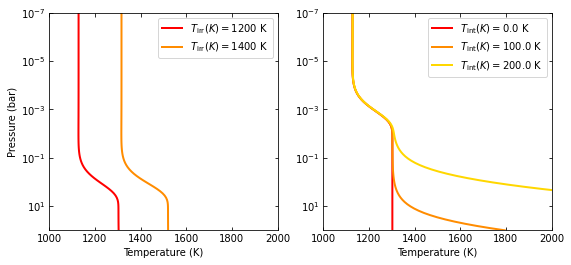

In [9]:
# T_irr sets how much incident flux the atmosphere receives:
# Think it as: higher T_irr, higher overall temperature
params21 = log_kappa, log_gamma1, log_gamma2, alpha, 1200.0, t_int
params22 = log_kappa, log_gamma1, log_gamma2, alpha, 1400.0, t_int
temp_guillot21 = tp_guillot(params21)
temp_guillot22 = tp_guillot(params22)

# T_int sets the planet internal heat from the bottom of the model:
# Think it as: higher T_int, stronger higher overall temperature
params31 = -3.0, log_gamma1, log_gamma2, alpha, t_irr, 0.0
params32 = -3.0, log_gamma1, log_gamma2, alpha, t_irr, 100.0
params33 = -3.0, log_gamma1, log_gamma2, alpha, t_irr, 300.0
temp_guillot31 = tp_guillot(params31)
temp_guillot32 = tp_guillot(params32)
temp_guillot33 = tp_guillot(params33)

plt.figure(22, (9.0,4.0))
plt.clf()
ax = plt.subplot(121)
pname = tp_guillot.texnames[4]
ax.plot(temp_guillot21, pressure, color='red', lw=2.0, label=f'{pname}$=1200$ K')
ax.plot(temp_guillot22, pressure, color='darkorange', lw=2.0, label=f'{pname}$=1400$ K')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.legend()

ax = plt.subplot(122)
pname = tp_guillot.texnames[5]
ax.plot(temp_guillot31, pressure, color='red', lw=2.0, label=f'{pname}$=0.0$ K')
ax.plot(temp_guillot32, pressure, color='darkorange', lw=2.0, label=f'{pname}$=100.0$ K')
ax.plot(temp_guillot33, pressure, color='gold', lw=2.0, label=f'{pname}$=200.0$ K')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.legend()

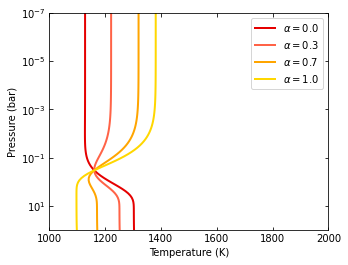

In [10]:
# A non-zero alpha (in combination with gamma2) enables a linear combination
# of two profiles with different gamma values:
temp_guillot41 = tp_guillot([log_kappa, -0.25, 0.4, 0.0, t_irr, t_int])
temp_guillot42 = tp_guillot([log_kappa, -0.25, 0.4, 0.3, t_irr, t_int])
temp_guillot43 = tp_guillot([log_kappa, -0.25, 0.4, 0.7, t_irr, t_int])
temp_guillot44 = tp_guillot([log_kappa, -0.25, 0.4, 1.0, t_irr, t_int])


plt.figure(23, (5.0,4.0))
plt.clf()
ax = plt.subplot(111)
pname = tp_guillot.texnames[3]
ax.plot(temp_guillot41, pressure, color='xkcd:red', lw=2.0, label=f'{pname}$=0.0$')
ax.plot(temp_guillot42, pressure, color='tomato', lw=2.0, label=f'{pname}$=0.3$')
ax.plot(temp_guillot43, pressure, color='orange', lw=2.0, label=f'{pname}$=0.7$')
ax.plot(temp_guillot44, pressure, color='gold', lw=2.0, label=f'{pname}$=1.0$')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_ylabel('Pressure (bar)')
ax.set_xlabel('Temperature (K)')
ax.legend()

## 3. Madhu TP Profile


The madhu model has six parameters: $\log p_1$, $\log p_2$, $\log p_3$, $a_1$,
$a_2$, and $T_0$, as described in Madhusudhan & Seager (2009), where the pressure
values must be given in bars.  The temperature profile is given as:

$$ T(p) = \left\{
  \begin{array}{lll}
  T_0 + \left[\frac{1}{a_1}\ln(p/p_0)\right]^2 & \text{for } p < p_1
     & (\rm layer\ 1) \\
  T_2 + \left[\frac{1}{a_2}\ln(p/p_2)\right]^2 & \text{for } p_1 \le p < p_3
     & (\rm layer\ 2) \\
  T_3   & \text{for } p \ge p_3 & (\rm layer\ 3)
  \end{array} \right.
$$

A thermally inverted profile will result when $p_1 < p_2$;
a non-inverted profile will result when $p_2 < p_1$.

The pressure parameters must also satisfy: $p_1 < p_3$ (otherwise the model will return zeros).


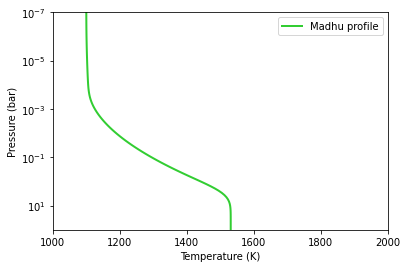

In [11]:
# To initialize a Madhu TP model, provide the pressure array (in CGS units):
tp_madhu = pa.tmodels.Madhu(pressure_cgs)


# A non thermally-inverted profile (p1 > p2):
log_p1 = -3.5
log_p2 = -4.0
log_p3 = 0.5
a1 = 3.0
a2 = 0.5
T0 = 1100.0
temp_madhu = tp_madhu([log_p1, log_p2, log_p3, a1, a2, T0])


# Plot the profile:
plt.figure(30)
plt.clf()
ax = plt.subplot(111)
ax.plot(temp_madhu, pressure, color='limegreen', lw=2.0, label='Madhu profile')
ax.set_yscale('log')
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.set_xlim(1000, 2000)
ax.legend()

In [12]:
# This is some useful data contained in the object:
print(f'TP model name: {tp_madhu.name}\n')
print(f'Number of parameters: {tp_madhu.npars}')
print(f'Parameter names: {tp_madhu.pnames}')
print(f'Parameter names as LaTeX: {tp_madhu.texnames}\n')
print(f'Pressure array (barye, i.e., CGS):\n{tp_madhu.pressure}\n')
print(f'Last evaluated temperature (K):\n{tp_madhu.temperature}')

TP model name: madhu

Number of parameters: 6
Parameter names: ['logp1', 'logp2', 'logp3', 'a1', 'a2', 'T0']
Parameter names as LaTeX: ['$\\log (p_1)$', '$\\log (p_2)$', '$\\log (p_3)$', '$a_1$', '$a_2$', '$T_0$']

Pressure array (barye, i.e., CGS):
[1.0000e-01 1.2303e-01 1.5136e-01 1.8621e-01 2.2909e-01 2.8184e-01
 3.4674e-01 4.2658e-01 5.2481e-01 6.4565e-01 7.9433e-01 9.7724e-01
 1.2023e+00 1.4791e+00 1.8197e+00 2.2387e+00 2.7542e+00 3.3884e+00
 4.1687e+00 5.1286e+00 6.3096e+00 7.7625e+00 9.5499e+00 1.1749e+01
 1.4454e+01 1.7783e+01 2.1878e+01 2.6915e+01 3.3113e+01 4.0738e+01
 5.0119e+01 6.1660e+01 7.5858e+01 9.3325e+01 1.1482e+02 1.4125e+02
 1.7378e+02 2.1380e+02 2.6303e+02 3.2359e+02 3.9811e+02 4.8978e+02
 6.0256e+02 7.4131e+02 9.1201e+02 1.1220e+03 1.3804e+03 1.6982e+03
 2.0893e+03 2.5704e+03 3.1623e+03 3.8905e+03 4.7863e+03 5.8884e+03
 7.2444e+03 8.9125e+03 1.0965e+04 1.3490e+04 1.6596e+04 2.0417e+04
 2.5119e+04 3.0903e+04 3.8019e+04 4.6774e+04 5.7544e+04 7.0795e+04
 8.7096e+04 1

### 3.1 Understanding the parameters

In [13]:
# Preamble:
log_p2_ninv = -4.0
log_p2_inv = 0.0
T0_ninv = 1100.0
T0_inv = 1500.0

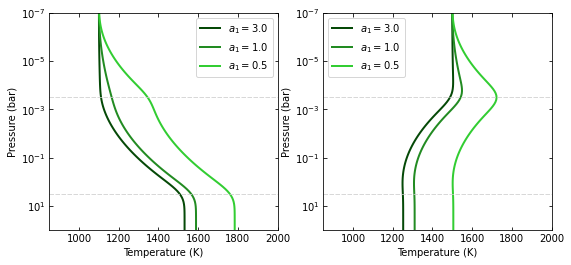

In [14]:
# a1 sets the gradient above the p1 pressure level:
# a1 >> 0.0: isothermal layer, a1>0: T increases away from P0

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, log_p3, 3.0, a2, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, log_p3, 1.0, a2, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, log_p3, 0.5, a2, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, log_p3, 3.0, a2, T0_inv])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, log_p3, 1.0, a2, T0_inv])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, log_p3, 0.5, a2, T0_inv])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[3]
labels = [f'{pname}$={val}$' for val in (3.0, 1.0, 0.5)]

plt.figure(31, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(850, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()

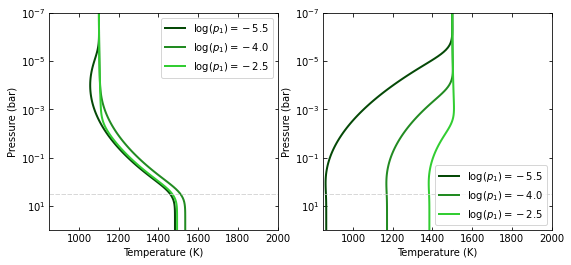

In [15]:
# log_p1 sets the location of the top layer:
# Note that since this is a piece-wise constructed model, the value
# of p1 has significant implications for the entire profile:

# Non-inverted TP profile
temp_madhu01 = tp_madhu([-5.5, log_p2_ninv, log_p3, a1, a2, T0_ninv])
temp_madhu02 = tp_madhu([-4.0, log_p2_ninv, log_p3, a1, a2, T0_ninv])
temp_madhu03 = tp_madhu([-2.5, log_p2_ninv, log_p3, a1, a2, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([-5.5, log_p2_inv, log_p3, a1, a2, T0_inv])
temp_madhu12 = tp_madhu([-4.0, log_p2_inv, log_p3, a1, a2, T0_inv])
temp_madhu13 = tp_madhu([-2.5, log_p2_inv, log_p3, a1, a2, T0_inv])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[0]
labels = [f'{pname}$={val}$' for val in (-5.5, -4.0, -2.5)]

plt.figure(32, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(850, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()

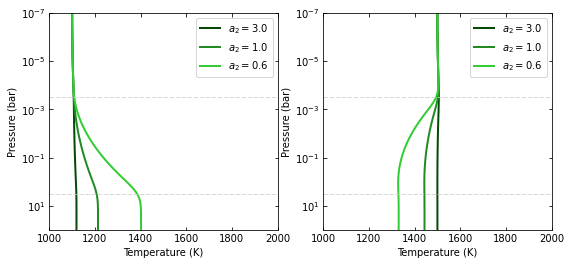

In [16]:
# a2 sets the temperature gradient between p3 < p < p1:
# a2 >> 0.0: isothermal layer, a2>0: T increases away from p2

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, 3.0, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, 1.0, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, 0.6, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, 3.0, T0_inv])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, 1.0, T0_inv])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, 0.6, T0_inv])


temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[4]
labels = [f'{pname}$={val}$' for val in (3.0, 1.0, 0.6)]

plt.figure(33, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()

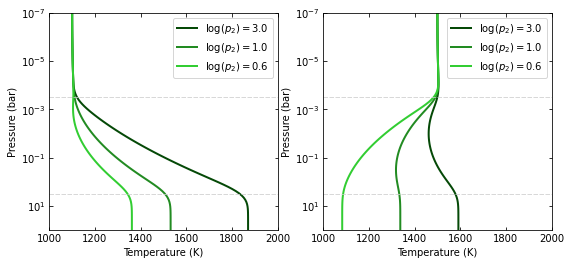

In [17]:
# log_p2 determines whether the atmosphere is thermally inverted
# (p1 < p2) or not (p1 > p2).

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, -6.0, log_p3, a1, a2, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, -4.0, log_p3, a1, a2, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, -3.0, log_p3, a1, a2, T0_ninv])
# Note that p2 values impact the profile even if p2 < p1
# temp_madhu03 is technically an inverted profile, but a tiny inv.

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, -2.0, log_p3, a1, a2, T0_inv])
temp_madhu12 = tp_madhu([log_p1, -0.5, log_p3, a1, a2, T0_inv])
temp_madhu13 = tp_madhu([log_p1, 1.0, log_p3, a1, a2, T0_inv])
# Note that p2 can have values larger than p3

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[1]
labels = [f'{pname}$={val}$' for val in (3.0, 1.0, 0.6)]

plt.figure(34, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()

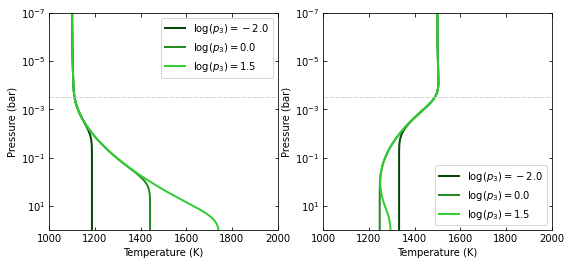

In [18]:
# logp3 sets the pressure of the isothermal lower layer:
# Note that p2 is allowed to be at a deeper location than p3

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, -2.0, a1, a2, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, 0.0, a1, a2, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, 1.5, a1, a2, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, -2.0, a1, a2, T0_inv])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, 0.0, a1, a2, T0_inv])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, 1.5, a1, a2, T0_inv])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[2]
labels = [f'{pname}$={val}$' for val in (-2.0, 0.0, 1.5)]

plt.figure(35, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()

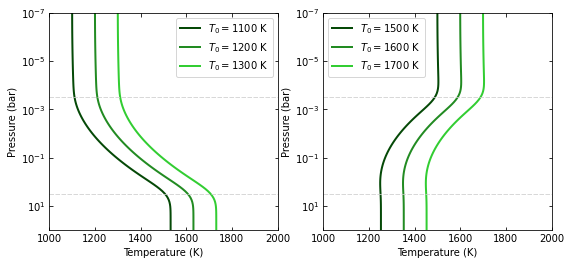

In [19]:
# T0 sets the temperature at the top of the profile:
# This shifts the entire profile

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, a2, 1100.0])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, a2, 1200.0])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, a2, 1300.0])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, a2, 1500.0])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, a2, 1600.0])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, a2, 1700.0])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[5]
labels = [
    f'{pname}$={val}$ K'
    for val in (1100, 1200, 1300, 1500, 1600, 1700)
]

plt.figure(36, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[3*i+0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[3*i+1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[3*i+2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()